<center>
<img src="../../img/ods_stickers.jpg" />
    
## [mlcourse.ai](https://mlcourse.ai) – Open Machine Learning Course 

Author: [Yury Kashnitsky](https://yorko.github.io). This material is subject to the terms and conditions of the [Creative Commons CC BY-NC-SA 4.0](https://creativecommons.org/licenses/by-nc-sa/4.0/) license. Free use is permitted for any non-commercial purpose.

# <center> Topic 1. Exploratory data analysis with Pandas
## <center>Practice. Analyzing "Titanic" passengers

**Fill in the missing code ("You code here") and choose answers in a [web-form](https://docs.google.com/forms/d/16EfhpDGPrREry0gfDQdRPjoiQX9IumaL2mPR0rcj19k/edit).**

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
# Graphics in SVG format are more sharp and legible
%config InlineBackend.figure_format = 'svg'
pd.set_option("display.precision", 2)

**Read data into a Pandas DataFrame**

In [2]:
data = pd.read_csv('../../data/titanic_train.csv',
                  index_col='PassengerId')

**First 5 rows**

In [3]:
data.head(5)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.28,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.92,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.10,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.05,NaN,S


In [4]:
data.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.00,891.00,714.00,891.00,891.00,891.00
mean,0.38,2.31,29.70,0.52,0.38,32.20
std,0.49,0.84,14.53,1.10,0.81,49.69
min,0.00,1.00,0.42,0.00,0.00,0.00
25%,0.00,2.00,20.12,0.00,0.00,7.91
50%,0.00,3.00,28.00,0.00,0.00,14.45
75%,1.00,3.00,38.00,1.00,0.00,31.00
max,1.00,3.00,80.00,8.00,6.00,512.33


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Name        891 non-null object
Sex         891 non-null object
Age         714 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Ticket      891 non-null object
Fare        891 non-null float64
Cabin       204 non-null object
Embarked    889 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


**Let's select those passengers who embarked in Cherbourg (Embarked=C) and paid > 200 pounds for their ticker (fare > 200).**

Make sure you understand how actually this construction works.

In [6]:
data[(data['Embarked'] == 'C') & (data.Fare > 200)].head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
119,0,1,"Baxter, Mr. Quigg Edmond",male,24.0,0,1,PC 17558,247.52,B58 B60,C
259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.33,NaN,C
300,1,1,"Baxter, Mrs. James (Helene DeLaudeniere Chaput)",female,50.0,0,1,PC 17558,247.52,B58 B60,C
312,1,1,"Ryerson, Miss. Emily Borie",female,18.0,2,2,PC 17608,262.38,B57 B59 B63 B66,C
378,0,1,"Widener, Mr. Harry Elkins",male,27.0,0,2,113503,211.50,C82,C


**We can sort these people by Fare in descending order.**

In [7]:
data[(data['Embarked'] == 'C') & 
     (data['Fare'] > 200)].sort_values(by='Fare',
                               ascending=False).head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.33,NaN,C
680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.33,B51 B53 B55,C
738,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.33,B101,C
312,1,1,"Ryerson, Miss. Emily Borie",female,18.0,2,2,PC 17608,262.38,B57 B59 B63 B66,C
743,1,1,"Ryerson, Miss. Susan Parker ""Suzette""",female,21.0,2,2,PC 17608,262.38,B57 B59 B63 B66,C


**Let's create a new feature.**

In [8]:
def age_category(age):
    '''
    < 30 -> 1
    >= 30, <55 -> 2
    >= 55 -> 3
    '''
    if age < 30:
        return 1
    elif age < 55:
        return 2
    elif age >= 55:
        return 3

In [9]:
age_categories = [age_category(age) for age in data.Age]
data['Age_category'] = age_categories

**Another way is to do it with `apply`.**

In [10]:
data['Age_category'] = data['Age'].apply(age_category)

**1. How many men/women were there onboard?**
- 412 men and 479 women
- 314 men and 577 women
- 479 men and 412 women
- 577 men and 314 women

In [11]:
# You code here
data['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

**2. Print the distribution of the `Pclass` feature. Then the same, but for men and women separately. How many men from second class were there onboard?**
- 104
- 108
- 112
- 125

In [12]:
# You code here
data['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [13]:
pd.crosstab(data['Sex'], data['Pclass'])

Pclass,1,2,3
Sex,,,
female,94,76,144
male,122,108,347


**3. What are median and standard deviation of `Fare`?. Round to two decimals.**
- median is  14.45, standard deviation is 49.69
- median is 15.1, standard deviation is 12.15
- median is 13.15, standard deviation is 35.3
- median is  17.43, standard deviation is 39.1

In [14]:
round(data['Fare'].std(), 2)

49.69

In [15]:
# You code here
round(data['Fare'].median(), 2)

14.45

**4. Is that true that the mean age of survived people is higher than that of passengers who eventually died?**
- Yes
- No


In [24]:
# You code here
data.groupby('Survived')['Age'].mean()

Survived
0    30.63
1    28.34
Name: Age, dtype: float64

**5. Is that true that passengers younger than 30 y.o. survived more frequently than those older than 60 y.o.? What are shares of survived people among young and old people?**
- 22.7% among young and 40.6% among old
- 40.6% among young and 22.7% among old
- 35.3% among young and 27.4% among old
- 27.4% among young and  35.3% among old

In [32]:
# You code here
young = data.loc[data['Age']<30, 'Survived']

In [34]:
old = data.loc[data['Age']>60, 'Survived']

In [45]:
print(len(young[young == 1]))

156


In [46]:
print(len(old[old == 1]))

5


In [41]:
print(len(young[]))

384


In [39]:
print("share of survived in young: {}".format(100 * young.mean()))

share of survived in young: 40.625


In [40]:
print("share of survived in old: {}".format(100 * old.mean()))

share of survived in old: 22.727272727272727


**6. Is that true that women survived more frequently than men? What are shares of survived people among men and women?**
- 30.2% among men and 46.2% among women
- 35.7% among men and 74.2% among women
- 21.1% among men and 46.2% among women
- 18.9% among men and 74.2% among women

In [58]:
women = data.loc[data['Sex']== 'female', 'Survived']

In [57]:
men = data.loc[data['Sex']== 'male', 'Survived']

In [59]:
print("Number of survived women {}".format(len(women[women == 1])))

Number of survived women 233


In [60]:
print("Number of survived men {}".format(len(men[men == 1])))

Number of survived men 109


In [61]:
# You code here
print("% of survived women {}".format(100 * women.mean()))

% of survived women 74.20382165605095


In [62]:
print("% of survived men {}".format(100 * men.mean()))

% of survived men 18.890814558058924


**7. What's the most popular first name among male passengers?**
- Charles
- Thomas
- William
- John

In [63]:
data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_category
PassengerId,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,NaN,S,1.0
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.28,C85,C,2.0
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.92,NaN,S,1.0
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.10,C123,S,2.0
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.05,NaN,S,2.0


In [76]:
# You code here
first_names_male = data.loc[data['Sex'] == 'male', 'Name'].apply(lambda a: a.split(',')[1].split()[1])

In [78]:
first_names_male.value_counts()

William      35
John         25
George       14
Thomas       13
Charles      13
             ..
Niels         1
Edwin         1
Ole           1
Gustave       1
Francesco     1
Name: Name, Length: 287, dtype: int64

**8. How is average age for men/women dependent on `Pclass`? Choose all correct statements:**
- On average, men of 1 class are older than 40
- On average, women of 1 class are older than 40
- Men of all classes are on average older than women of the same class
- On average, passengers ofthe first class are older than those of the 2nd class who are older than passengers of the 3rd class

In [79]:
# You code here
data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_category
PassengerId,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,NaN,S,1.0
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.28,C85,C,2.0
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.92,NaN,S,1.0
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.10,C123,S,2.0
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.05,NaN,S,2.0


In [84]:
# Average age of men of first class
data[(data['Sex'] == 'male') & (data['Pclass'] == 1)]['Age'].mean()

41.28138613861386

In [85]:
# Average age of women of 1st class
data[(data['Sex'] == 'female') & (data['Pclass'] == 1)]['Age'].mean()

34.61176470588235

In [88]:
# Are men of all class older than women of same class
for pclass in [1, 2, 3]:
    print("Class {}".format(pclass))
    men = data[(data['Sex'] == 'male') & (data['Pclass'] == pclass)]['Age'].mean()
    print("Avg age of men in class {}: {}".format(pclass, men))
    women = data[(data['Sex'] == 'female') & (data['Pclass'] == pclass)]['Age'].mean()
    print("Avg age of women in class {}: {}".format(pclass, women))

Class 1
Avg age of men in class 1: 41.28138613861386
Avg age of women in class 1: 34.61176470588235
Class 2
Avg age of men in class 2: 30.74070707070707
Avg age of women in class 2: 28.722972972972972
Class 3
Avg age of men in class 3: 26.507588932806325
Avg age of women in class 3: 21.75


In [89]:
pd.crosstab(data['Pclass'], data['Sex'], values=data['Age'], aggfunc=np.mean)

Sex,female,male
Pclass,,
1,34.61,41.28
2,28.72,30.74
3,21.75,26.51


In [91]:
data.groupby('Pclass')['Age'].mean()

Pclass
1    38.23
2    29.88
3    25.14
Name: Age, dtype: float64

In [92]:
import seaborn as sns

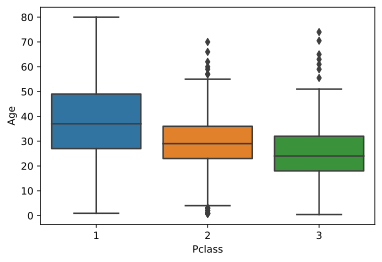

In [93]:
sns.boxplot(data['Pclass'], data['Age'])

## Useful resources
* The same notebook as an interactive web-based [Kaggle Kernel](https://www.kaggle.com/kashnitsky/topic-1-practice-analyzing-titanic-passengers) with a [solution](https://www.kaggle.com/kashnitsky/topic-1-practice-solution)
* Topic 1 "Exploratory Data Analysis with Pandas" as a [Kaggle Kernel](https://www.kaggle.com/kashnitsky/topic-1-exploratory-data-analysis-with-pandas)
* Main course [site](https://mlcourse.ai), [course repo](https://github.com/Yorko/mlcourse.ai), and YouTube [channel](https://www.youtube.com/watch?v=QKTuw4PNOsU&list=PLVlY_7IJCMJeRfZ68eVfEcu-UcN9BbwiX)